In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams["font.family"] = "Times"


In [2]:
STRATEGY = ["desktop", "mobile"][1]
CATEGORY = ["accessibility", "performance", "best-practices"][0]


In [3]:
JSON_FILE_NAME = f"data/{STRATEGY}_{CATEGORY}.json"
print(JSON_FILE_NAME)


data/mobile_accessibility.json


In [4]:
json_obj = None
with open(JSON_FILE_NAME, "r") as in_file:
    json_obj = json.load(in_file)


In [5]:
scores = []
best_score = 0
best_website = None
for k, v in json_obj.items():
    try:
        acc_score = v["lighthouseResult"]["categories"]["accessibility"]["score"] * 100
        if acc_score > best_score:
            best_score = acc_score
            best_website = k
        scores.append(acc_score)
    except:
        print(k)

scores = np.array(scores)


Konya Büyükşehir Belediyesi


In [6]:
print(best_score, best_website)


91.0 Gaziantep Büyükşehir Belediyesi


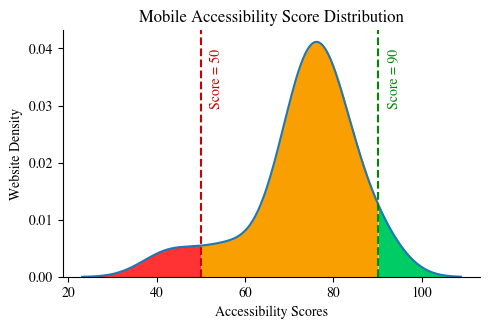

In [7]:
graph = sns.displot(scores, kind="kde", height=3, aspect=5/3)
graph.refline(x=90, color="#080")
graph.refline(x=50, color="#c00")

graph.set(xlabel="Accessibility Scores",
          ylabel="Website Density",
          title="Mobile Accessibility Score Distribution")

axes = graph.axes.flatten()
axes[0].text(92, 0.03, "Score = 90", c="#080", rotation=90)
axes[0].text(52, 0.03, "Score = 50", c="#c00", rotation=90)

kde_x = axes[0].lines[0].get_xdata()
kde_y = axes[0].lines[0].get_ydata()

axes[0].fill_between(kde_x, kde_y, where=(kde_x < 50), color="#f33")
axes[0].fill_between(kde_x, kde_y, where=(kde_x >= 50)
                     & (kde_x <= 90), color="#fa9f02")
axes[0].fill_between(kde_x, kde_y, where=(kde_x > 90), color="#0c6")

plt.savefig(f"results/{STRATEGY}_{CATEGORY}.pdf", bbox_inches="tight")
plt.show()


In [8]:
np.mean(scores)


73.44827586206897

In [9]:
print(np.max(scores), np.min(scores))


91.0 41.0


In [10]:
len(scores[np.where(scores >= 90)]) / len(scores) * 100


6.896551724137931

In [16]:
len(scores[np.where(scores <= 50)]) / len(scores) * 100

6.896551724137931

In [12]:
len(scores)


29

In [15]:
for k, v in json_obj.items():
    try:
        acc_score = v["lighthouseResult"]["categories"]["accessibility"]["score"] * 100
        if acc_score < 51:
            print(k)
    except:
        pass


Muğla Büyükşehir Belediyesi
Şanlıurfa Büyükşehir Belediyesi
